# Experiments & Plots

In [1]:
import torch
import random
import probscale
import numpy as np
import pandas as pd
import seaborn as sns
import gymnasium as gym
import matplotlib.pyplot as plt

from src.env import CustomLunarLander, AdversarialLunarLander
from src.models import *
from src import util

np.seterr(all='raise'); # raise exceptions on errors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}") # device for pytorch
gym.register(id="CustomLunarLander-v0", entry_point=CustomLunarLander)
gym.register(id="AdversarialLunarLander-v0", entry_point=AdversarialLunarLander)

Using device: cuda


In [2]:
# agent wrappers for compatibility
class HeuristicWrapper:
    def get_action(self, obs):
        return torch.tensor(heuristic(np.array([obs.detach().cpu()]))[0])
class PPOWrapper:
    def __init__(self, agent):
        self.agent = agent
    def get_action(self, obs):
        return self.agent.get_action_and_value(obs)[0]

# load agents
heuristic_agent = HeuristicWrapper()
ddqn_nowind = DDQN_Agent(8, 4).to(device)
ddqn_nowind.load_state_dict(torch.load("models/DQN-NoWind-1748021837.802172"))
ppo_nowind = PPOWrapper(PPO_Agent(8, 4).to(device))
ppo_nowind.agent.load_state_dict(torch.load("models/PPO-NoWind-1748011070.826964"))
ddqn_wind = DDQN_Agent(8, 4).to(device)
ddqn_wind.load_state_dict(torch.load("models/DDQN-Wind-1748101361.733588"))
ppo_wind = PPOWrapper(PPO_Agent(8, 4).to(device))
ppo_wind.agent.load_state_dict(torch.load("models/PPO-Wind-1748032298.1644526"))
ddqn_adversarial = DDQN_Agent(8, 4).to(device)
ddqn_adversarial.load_state_dict(torch.load("models/protagonist-Adversary-DDQN-1748092498.3286374"))
ppo_adversarial = PPOWrapper(PPO_Agent(8, 4).to(device))
ppo_adversarial.agent.load_state_dict(torch.load("models/protagonist-Adversary-PPO-1748115488.6525826"));

### Scenario 1: No Wind

In [9]:
config = {
    "gravity": -10.0,
    "enable_wind": False,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [10]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario1.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:26<00:00,  1.36it/s]

seed                        4962.305000
rewards_heuristic            238.860169
rewards_ddqn_nowind          191.355378
rewards_ppo_nowind           188.725253
rewards_ddqn_wind            244.087964
rewards_ppo_wind             233.979729
rewards_ddqn_adversarial     242.969735
rewards_ppo_adversarial      222.724622
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,53.411149,291.171968,260.468599,271.199736,266.387792,270.896687,302.178932
1,4385,285.502448,174.859578,166.645870,151.578824,148.780935,278.520384,213.686567
2,1428,285.514016,168.858462,-28.921031,242.548587,9.154463,287.815108,-30.492082
3,6672,201.102446,152.568748,230.306411,257.823893,269.553354,275.378722,262.970575
4,4367,-220.342221,190.448444,209.233025,271.113018,278.925170,300.875238,266.820707


### Scenario 2: Default Wind

In [26]:
config = {
    "gravity": -10.0,
    "enable_wind": True,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [27]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario2.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:21<00:00,  1.42it/s]

seed                        4962.305000
rewards_heuristic             76.200648
rewards_ddqn_nowind           75.828756
rewards_ppo_nowind            99.593933
rewards_ddqn_wind            195.725883
rewards_ppo_wind             170.373142
rewards_ddqn_adversarial     163.123813
rewards_ppo_adversarial      156.528135
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,-41.199745,-159.869754,315.529780,49.134299,306.798582,-44.773544,150.946721
1,4385,-183.505897,-27.823545,155.033052,159.461918,-165.908381,-167.168550,226.292082
2,1428,292.460891,238.811070,-37.485063,252.992937,294.653778,-159.734761,-21.200832
3,6672,28.380840,28.321570,-49.103240,260.222274,262.973556,-19.716383,-69.214197
4,4367,29.094407,293.061500,163.917797,303.650976,324.139454,308.588029,306.651505


### Scenario 3: Strong Wind

In [28]:
config = {
    "gravity": -10.0,
    "enable_wind": True,
    "wind_power": 20.0,
    "turbulence_power": 2.0,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [29]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario3.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [01:51<00:00,  1.80it/s]

seed                        4962.305000
rewards_heuristic             35.304487
rewards_ddqn_nowind           -9.302420
rewards_ppo_nowind            30.241152
rewards_ddqn_wind            127.135048
rewards_ppo_wind              96.514962
rewards_ddqn_adversarial      62.153548
rewards_ppo_adversarial       71.611103
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,-115.317010,-249.187180,51.368387,315.555500,318.853077,-166.208876,33.115168
1,4385,-214.994904,-196.699597,178.319247,230.852092,-192.136371,-92.107950,182.653156
2,1428,311.194226,278.401413,-23.527308,21.918801,295.600223,246.484633,-25.894933
3,6672,-31.268032,-13.023125,-78.657893,-33.244630,24.343136,-39.590704,-88.098525
4,4367,12.563630,8.088854,6.294070,183.565962,45.903592,286.403142,235.011508


### Scenario 4: No Wind + Higher Initial Force

In [3]:
config = {
    "gravity": -10.0,
    "enable_wind": False,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}
# ! Set Force to 1500 in CustomLunarLander ! #

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [4]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario4.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:07<00:00,  1.57it/s]

seed                        4962.305000
rewards_heuristic            259.643764
rewards_ddqn_nowind          185.701985
rewards_ppo_nowind           164.309148
rewards_ddqn_wind            244.721196
rewards_ppo_wind             210.301829
rewards_ddqn_adversarial     240.942614
rewards_ppo_adversarial      227.169045
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,311.190808,223.961889,45.089486,305.884662,281.024678,296.571104,335.715301
1,4385,292.638747,178.667457,199.594629,209.457009,280.714597,299.030567,244.944196
2,1428,305.612132,319.837084,-34.887792,261.352670,246.836801,43.422356,251.937348
3,6672,247.875480,267.021061,213.049253,258.150828,291.440544,283.844216,272.462183
4,4367,324.390881,-168.787108,-50.373213,287.727040,300.158844,139.962921,355.377964


### Scenario 5: Default Wind + Higher Initial Force

In [5]:
config = {
    "gravity": -10.0,
    "enable_wind": True,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}
# ! Set Force to 1500 in CustomLunarLander ! #

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [6]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario5.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:06<00:00,  1.58it/s]

seed                        4962.305000
rewards_heuristic             72.994232
rewards_ddqn_nowind           63.541800
rewards_ppo_nowind            82.617263
rewards_ddqn_wind            174.251919
rewards_ppo_wind             145.786748
rewards_ddqn_adversarial     137.374947
rewards_ppo_adversarial      136.364699
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,266.462149,-320.166289,89.427223,34.162063,328.425029,111.834744,351.769751
1,4385,-70.708965,-285.006946,225.746164,-181.160339,-148.625139,-211.285998,206.453357
2,1428,325.911999,317.394380,-52.298102,270.913877,28.349918,34.914540,35.415633
3,6672,74.696019,208.931253,-34.538331,243.521300,290.675010,28.062131,-40.419095
4,4367,-26.327791,7.150170,318.944876,312.488638,341.760065,290.467366,311.180443


### Scenario 6: Increased Gravity

In [34]:
config = {
    "gravity": -11.99,
    "enable_wind": False,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [35]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario6.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:12<00:00,  1.51it/s]

seed                        4962.305000
rewards_heuristic            108.034337
rewards_ddqn_nowind          160.604711
rewards_ppo_nowind           168.382024
rewards_ddqn_wind            238.414119
rewards_ppo_wind             222.963126
rewards_ddqn_adversarial     220.022625
rewards_ppo_adversarial      213.658629
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,16.815708,187.790111,57.710545,279.749797,270.148381,284.519234,289.459620
1,4385,292.457471,272.815617,160.602843,51.664406,137.446161,37.315374,38.766847
2,1428,-42.348259,163.428370,-5.308637,215.763841,12.436250,301.069522,-39.677213
3,6672,-3.344077,144.467396,224.235731,19.400828,268.930211,42.515599,219.254300
4,4367,-5.724021,24.280578,208.934030,260.213476,281.016863,59.062977,252.950979


### Scenario 7: Decreased Gravity

In [36]:
config = {
    "gravity": -8.0,
    "enable_wind": False,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [37]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario7.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:46<00:00,  1.20it/s]

seed                        4962.305000
rewards_heuristic            280.231765
rewards_ddqn_nowind          201.690644
rewards_ppo_nowind           185.710104
rewards_ddqn_wind            234.972166
rewards_ppo_wind             229.707774
rewards_ddqn_adversarial     235.608445
rewards_ppo_adversarial      217.527003
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,308.431626,303.889621,269.227566,268.719750,283.297136,275.920033,292.096553
1,4385,303.125398,184.024448,176.059548,277.539895,135.261417,266.809464,254.474686
2,1428,300.240882,156.801446,-136.819720,260.164747,208.710065,278.157029,198.332198
3,6672,263.661176,124.410311,196.115359,260.247899,270.830236,264.454604,195.613692
4,4367,312.552392,296.305068,-10.085246,278.092690,271.925071,280.114703,266.760951


### Scenario 8: Engine Noise

In [3]:
config = {
    "gravity": -10.0,
    "enable_wind": False,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}
# ! Set NOISE to True in CustomLunarLander ! #

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [4]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario8.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:34<00:00,  1.30it/s]

seed                        4962.305000
rewards_heuristic            243.212507
rewards_ddqn_nowind          190.813237
rewards_ppo_nowind           192.369094
rewards_ddqn_wind            243.331223
rewards_ppo_wind             235.366956
rewards_ddqn_adversarial     243.973784
rewards_ppo_adversarial      216.483087
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,61.924663,294.440110,159.367795,258.075794,281.528531,277.309499,299.147227
1,4385,287.519824,174.460805,161.819547,156.401216,146.272736,286.023010,210.567131
2,1428,301.519873,170.813638,-76.511138,253.237917,30.182248,236.122209,199.416791
3,6672,218.394632,151.478772,16.654247,250.436701,262.661988,267.227865,258.386969
4,4367,-118.122698,192.922408,208.464827,253.080749,267.776953,53.423286,274.154781


### Scenario 9: Default Wind + Higher Initial Force + Engine Noise

In [5]:
config = {
    "gravity": -10.0,
    "enable_wind": True,
    "wind_power": 15.0,
    "turbulence_power": 1.5,
    "max_episode_steps": 1000,

    "init_seed": 123,
    "num_seeds": 200
}
# ! Set Force to 1500 in CustomLunarLander ! #
# ! Set NOISE to True in CustomLunarLander ! #

# generate seeds
random.seed(config["init_seed"])
seeds = random.sample(range(0, 9999), config["num_seeds"])
df = pd.DataFrame(np.array(seeds).T, columns=["seed"])
df["seed"] = df["seed"].astype(int)
df.head()

,seed
0,857
1,4385
2,1428
3,6672
4,4367


In [6]:
df["rewards_heuristic"] = np.array(util.evaluate(heuristic_agent, seeds, config, device)).T
df["rewards_ddqn_nowind"] = np.array(util.evaluate(ddqn_nowind, seeds, config, device)).T
df["rewards_ppo_nowind"] = np.array(util.evaluate(ppo_nowind, seeds, config, device)).T
df["rewards_ddqn_wind"] = np.array(util.evaluate(ddqn_wind, seeds, config, device)).T
df["rewards_ppo_wind"] = np.array(util.evaluate(ppo_wind, seeds, config, device)).T
df["rewards_ddqn_adversarial"] = np.array(util.evaluate(ddqn_adversarial, seeds, config, device)).T
df["rewards_ppo_adversarial"] = np.array(util.evaluate(ppo_adversarial, seeds, config, device)).T
df.to_csv("results/scenario9.csv") # backup results
print(df.mean())
df.head()

100%|██████████| 200/200 [02:04<00:00,  1.60it/s]

seed                        4962.305000
rewards_heuristic             69.802918
rewards_ddqn_nowind           60.524025
rewards_ppo_nowind            90.855454
rewards_ddqn_wind            166.288547
rewards_ppo_wind             147.375951
rewards_ddqn_adversarial     143.769100
rewards_ppo_adversarial      133.869888
dtype: float64


,seed,rewards_heuristic,rewards_ddqn_nowind,rewards_ppo_nowind,rewards_ddqn_wind,rewards_ppo_wind,rewards_ddqn_adversarial,rewards_ppo_adversarial
0,857,346.590395,-246.605987,309.740748,32.126576,321.736943,98.211140,340.434111
1,4385,-172.316131,-306.499152,-171.259643,-177.908653,-206.617440,-191.853620,221.882482
2,1428,330.544248,306.841566,-34.011647,252.390769,35.476089,42.251330,40.634915
3,6672,303.131959,253.536075,-44.026230,261.323537,290.107112,20.891346,-26.927987
4,4367,-2.584040,341.324377,151.460817,301.524703,316.464579,276.943048,345.154912


### Plots

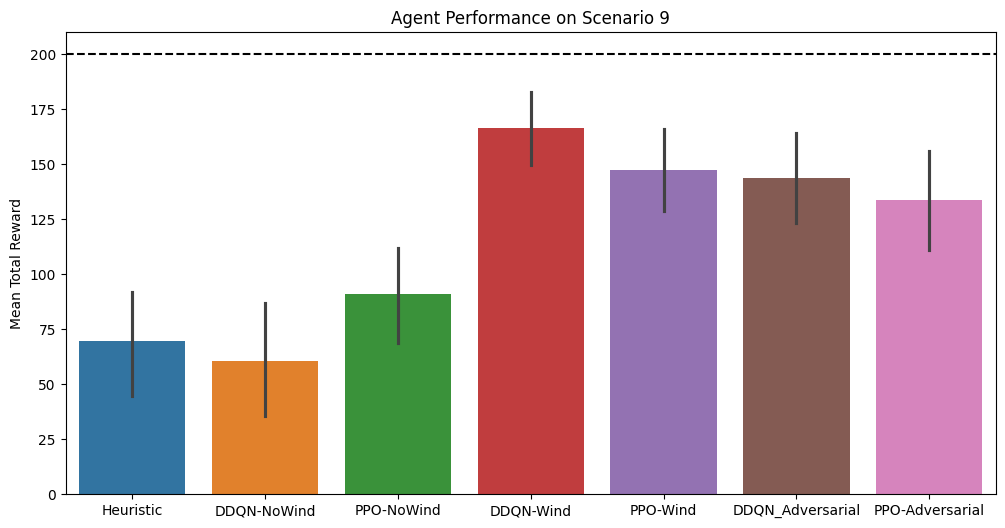

In [10]:
SCENARIO = 9
df = pd.read_csv(f"results/scenario{SCENARIO}.csv", index_col=0).drop(columns=["seed"])
df.columns = ["Heuristic", "DDQN-NoWind", "PPO-NoWind", "DDQN-Wind", "PPO-Wind", "DDQN_Adversarial", "PPO-Adversarial"]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(df, ax=ax)
ax.axhline(y=200, color="black", linestyle='--')
ax.set_title(f"Agent Performance on Scenario {SCENARIO}")
ax.set_ylabel("Mean Total Reward");

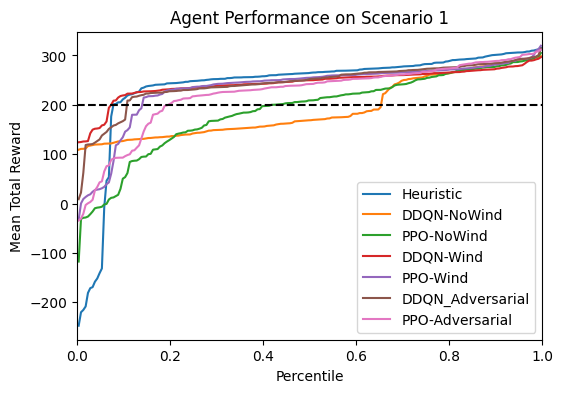

In [20]:
SCENARIO = 1
df = pd.read_csv(f"results/scenario{SCENARIO}.csv", index_col=0).drop(columns=["seed"])
df.columns = ["Heuristic", "DDQN-NoWind", "PPO-NoWind", "DDQN-Wind", "PPO-Wind", "DDQN_Adversarial", "PPO-Adversarial"]

fig, ax = plt.subplots(figsize=(6, 4))
for column in df.columns:
    position, data = probscale.plot_pos(df[column])
    ax.plot(position, data, linestyle='-', label=column)
ax.legend()
ax.axhline(y=200, color="black", linestyle='--')
ax.set_title(f"Agent Performance on Scenario {SCENARIO}")
ax.set_ylabel("Mean Total Reward")
ax.set_xlabel("Percentile")
ax.set_xlim(0, 1);